# Using Index Tables

## Learning Objectives

In this tutorial, we will:
- discuss the purpose and scope of secondary index tables in LSDB
- explore using index tables to find GAIA objects, by designation

## Introduction

HATS catalogs are partitioned spatially, typically on right ascension and declination. This makes finding objects in a particular area of the sky very straightforward. However, you may occassionally only know the object by the survey-assigned identifier.

HATS supports creating additional secondary index tables, stored separately from the HATS catalog. You can find more information about creating these index tables in the [hats-import documentation](https://hats-import.readthedocs.io/en/latest/guide/index_table.html), or request that your archive provider create an index table for your use.

## 1. Load a catalog collection

HATS catalogs and supplemental tables can be gathered together into a "catalog collection". In this way, margins and index tables can be accessed without needing to know their subdirectories. 

In [1]:
%%time
import lsdb

obj_lc = lsdb.open_catalog("https://data.lsdb.io/hats/mock_dp1/object_collection")

CPU times: user 2.03 s, sys: 644 ms, total: 2.67 s
Wall time: 5.26 s


We can inspect the catalog's collection properties and find which columns have secondary index tables.

In [2]:
list(obj_lc.hc_collection.all_indexes.keys())

['objectId']

## 2. Find items by ID

In [3]:
## vectorized lookup currently blocked by https://github.com/astronomy-commons/lsdb/issues/764
## Pick one ID, `some_id`

ids = list(obj_lc["objectId"].head(10))
some_id = ids[5]
ids

[4601903407187192593,
 4601844406312166617,
 4601905423160085759,
 4602077506480630149,
 4601846701952934704,
 4602261503924196592,
 4601966794686666133,
 4601742184040197817,
 4601977928673159913,
 4601840869906803130]

In [4]:
%%time
obj_lc.id_search(values={"objectId": some_id}).compute()

CPU times: user 1.08 s, sys: 179 ms, total: 1.26 s
Wall time: 3.09 s


objectId   refFwhm shape_flag  \
_healpix_29                                                  
9115862815668981  4602261503924196592  0.959451      False   

                      parentObjectId            x            y       xErr  \
_healpix_29                                                                 
9115862815668981  190071475064645065  8338.206324  8225.705667  72.615936   

                        yErr    shape_yy   shape_xx  ...  i_kronMagErr  \
_healpix_29                                          ...                 
9115862815668981  571.118591  239.663376  19.366634  ...      2.935393   

                   z_psfMag  z_psfMagErr  z_kronMag  z_kronMagErr  y_psfMag  \
_healpix_29                                                                   
9115862815668981  17.978565     2.006024  18.130068      3.823719      <NA>   

                  y_psfMagErr y_kronMag  y_kronMagErr  \
_healpix_29                                             
9115862815668981         <NA>      <NA>          <NA>   

                                                 objectForcedSource  
_healpix_29                                                          
9115862815668981  [{parentObjectId: 0, coord_ra: 39.556731, coor...  

[1 rows x 73 columns]

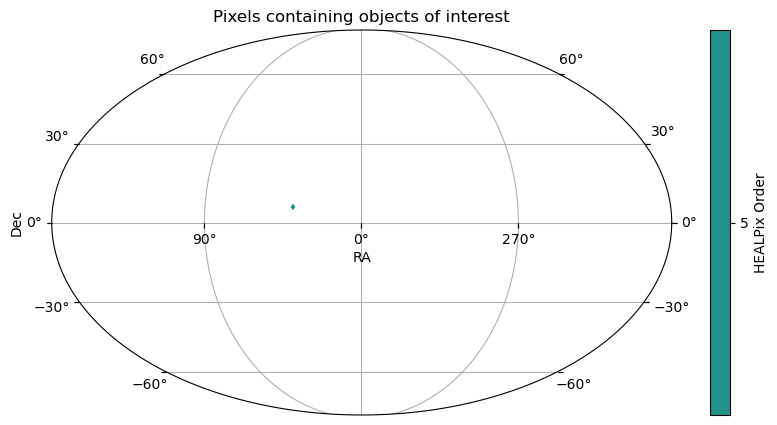

In [5]:
_ = obj_lc.id_search(values={"objectId": some_id}).plot_pixels(
    plot_title="Pixels containing objects of interest"
)

## About

**Authors**:  Melissa DeLucchi

**Last updated on**: May 19, 2025

If you use `lsdb` for published research, please cite following [instructions](https://docs.lsdb.io/en/stable/citation.html).